<a href="https://colab.research.google.com/github/ahmedlila/Machine-Learning-Course-Implementations/blob/main/Lab%208%20-%20%20Adult%20and%20Fish%20Market%20Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://zewailcity.edu.eg/main/images/logo3.png) 

_Requirements Solved by_  [**Ahmed Lila - 201800251**](mailto:s-ahmedlila@zewailcity.edu.eg) 


## **Task: Work with the COMPLETE [dataset](https://archive.ics.uci.edu/ml/datasets/adult)**

> **Justify all your steps. Elaborate and describe as much as possible.** <br>
> The target in the dataset is the **<=50K** column.

- **EDA [ 3 points ]:**
1. Load the dataset and perform the suitable data preprocessing/cleaning. (1 mark) <br>
2. Propose at least two questions about the dataset and use visualizations to answer those questions. (1 mark) <br>
3. Describe which features/values could be of most importance to the Decision trees algorithm based on your analysis. (1 mark) <br>


- **Test with our implementation [ 1 point  ]:** <br>
1. Run our implementation on the complete dataset. (0.5 marks) <br>
2. Compare the accuracy you get with the one we got before. Explain why the results are either better or worse. (0.5 marks)


- **Use Sklearn [ 2 point  ]:** <br>
1. Use Sklearn model. (0.5 marks) <br>
2. Perform hyper-parameter tuning using gridsearch. (0.5 marks) <br>
3. Visualize the tree by using the sklearn functions. Discuss the first two features and attributes that the tree were split on. Do they make sense? (1 mark)


- **Rerun the model on the most important features [ 2 point  ] :**  
1. Plot the feature importance, and choose the most important 5 of them. (1 mark) <br>
2. Run our algorithm only on them and compare the accuracy you get with the accuracy you got on the full dataset. (1 mark)


- **Compare with KNN [2 points]:**
1. Use cross validation to compare KNN and decision trees. (1 mark) <br>
2. Run grid search on the better model (if it is decision trees, you don't have to do it again). (0.5 marks) <br>
3. Try to justify why KNN or Decision trees is better/worse? (0.5 marks)


**Please check the Findings section below**

## About the data

Prediction task is to determine whether a person makes over 50K a year.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. [Its a weight assigned by the Census Bureau. The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. This feature represents how many people have the same list of features]
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Research Questions: 
- Is this a balanced data? 
- Do males that get >50K are more than females? 
- Do the education stages affect on getting >50K?
- Does it require more hours per week to achieve >50K/Y?

## EDA

### 1) Import Libraries and Dataset 

In [ ]:
#import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, MultiTaskLassoCV, LassoLarsCV
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus
from IPython.display import Image  
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
cols= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [ ]:
# Remove '?' as it refers to NA values, and it's shown that all elements had initial space and reset index
df=pd.read_csv('adult.csv',names= cols, skipinitialspace=True, na_values='?').dropna()
df.head(5)

age         workclass  fnlwgt  ... hours-per-week  native-country target
0   39         State-gov   77516  ...             40   United-States  <=50K
1   50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2   38           Private  215646  ...             40   United-States  <=50K
3   53           Private  234721  ...             40   United-States  <=50K
4   28           Private  338409  ...             40            Cuba  <=50K

[5 rows x 15 columns]

### 2) Preprocessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  target          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

age        fnlwgt  ...  capital-loss  hours-per-week
count  30162.000000  3.016200e+04  ...  30162.000000    30162.000000
mean      38.437902  1.897938e+05  ...     88.372489       40.931238
std       13.134665  1.056530e+05  ...    404.298370       11.979984
min       17.000000  1.376900e+04  ...      0.000000        1.000000
25%       28.000000  1.176272e+05  ...      0.000000       40.000000
50%       37.000000  1.784250e+05  ...      0.000000       40.000000
75%       47.000000  2.376285e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [ ]:
#check for missing data, duplicates
#Already removed NA values
print('Train - Missing values -> {}'.format(df.isna().sum().sum()))
print('Train - Duplicate values -> {}'.format(df.duplicated().sum()))

Train - Missing values -> 0
Train - Duplicate values -> 23


In [ ]:
# Remove Any duplicates or Missing values
#CODE
df.drop_duplicates(inplace=True)
#TEST
print('duplicate values -> {}'.format(df.duplicated().sum()))

duplicate values -> 0


In [ ]:
#Mapping in target columns, who has >50K is equal to 1, else 0
df['target']= df['target'].map({"<=50K": 0, ">50K": 1})
df2=df.copy(deep=True) #Save copy for our implementation

#### A- Univariate Analysis

<b> 1- Is this a balanced data?

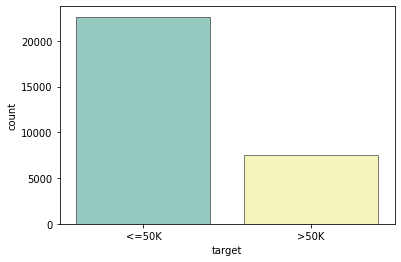

In [ ]:
ax=sns.countplot(x='target',data=df, palette='Set3', linewidth=0.5, edgecolor='black');
ax.set_xticklabels(['<=50K','>50K']);

- It's clear that data is imbalanced with 25% [>50K] and 75% [<=50K]

Males and Females distribution

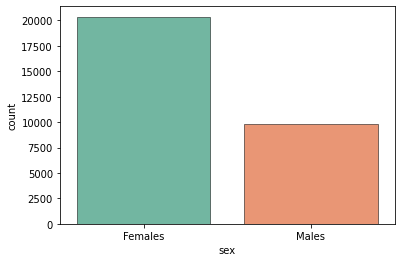

In [ ]:
ax=sns.countplot(x='sex',data=df, palette='Set2', linewidth=0.5, edgecolor='black');
ax.set_xticklabels(['Females','Males']);

In [ ]:
sex_values= df.sex.value_counts()
male_ha= 100*df[df['sex']=='Male']['target'].value_counts()/sex_values[0] #Percentage of men who are having >50K
female_ha= 100*df[df['sex']=='Female']['target'].value_counts()/sex_values[1] #Percentage of women who are having >50K

<b> 2- Do males that get >50K are more than females?

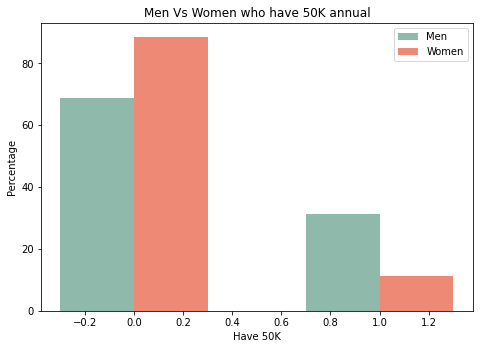

In [ ]:
data = [male_ha, female_ha]
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
ax.bar(df['target'].unique()-0.15, data[0], color = '#8FB9AA', width = 0.3);
ax.bar(df['target'].unique()+0.15, data[1], color = '#ED8975', width = 0.3);
ax.legend(['Men', 'Women']);
plt.xlabel('Have 50K')
plt.ylabel('Percentage')
plt.title('Men Vs Women who have 50K annual')
plt.show()

- Yes, due to the above distribution, Males that get >50K are 33% and females 12%

<b> 3- Do the education stages affect on getting >50K?

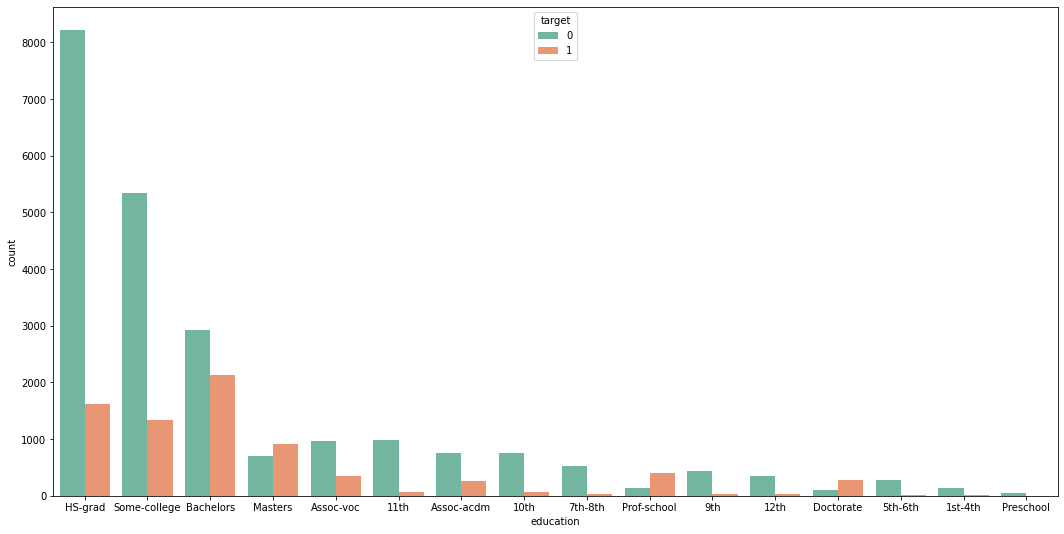

In [ ]:
plt.subplots(figsize=(18,9)) 
sns.countplot(x='education', hue='target', data=df, palette='Set2',order = df['education'].value_counts().index); #-> box 

- It's shown that people who has higher eduaction are having almost same distribution (people who have >50K and who have <=50K) 
- for example(BSc. Masters, Doctorate)

<b> 4- Does it require more hours per week to achieve 50K/Y?

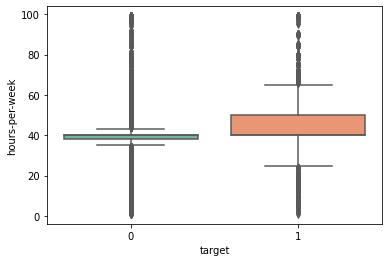

In [ ]:
sns.boxplot(x=df['target'],y=df['hours-per-week'], palette='Set2');  

- Most people that get >50K works more than 40h per week, So Yes most of them work more hours than people that get <=50K

#### B- Ordinal Encoding

In [ ]:
#Gender
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
#Race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4})
#Relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,
                                                         'Husband': 4,'Own-child': 5})
#Marital Status
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3,
                                   'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6})
#Workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,
                                       'Private': 5, 'Self-emp-not-inc': 6})
#Occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,
                                         'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,
                                         'Protective-serv':14})
#Country
df['native-country']=df['native-country'].map({'United-States': 0, 'Cambodia': 1, 'England': 2,
                                               'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6
                                               , 'India': 7, 'Japan': 8, 'Greece': 9, 'South': 10, 'China': 11
                                               , 'Cuba': 12, 'Iran': 13, 'Honduras': 14, 'Philippines': 15
                                               , 'Italy': 16, 'Poland': 17, 'Jamaica': 18, 'Vietnam': 19, 'Mexico': 20
                                               , 'Portugal': 21, 'Ireland': 22, 'France': 23, 'Dominican-Republic': 24
                                               , 'Laos': 25, 'Ecuador': 26, 'Taiwan': 27, 'Haiti': 28, 'Columbia': 29, 'Hungary': 30
                                               , 'Guatemala': 31, 'Nicaragua': 32, 'Scotland': 33, 'Thailand': 34, 'Yugoslavia': 35
                                               , 'El-Salvador': 36, 'Trinadad&Tobago': 37, 'Peru': 38,
                                               'Hong': 39, 'Holand-Netherlands': 40})
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6,
                                       'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12,
                                        '10th': 13,'Assoc-voc': 14,'9th': 15})

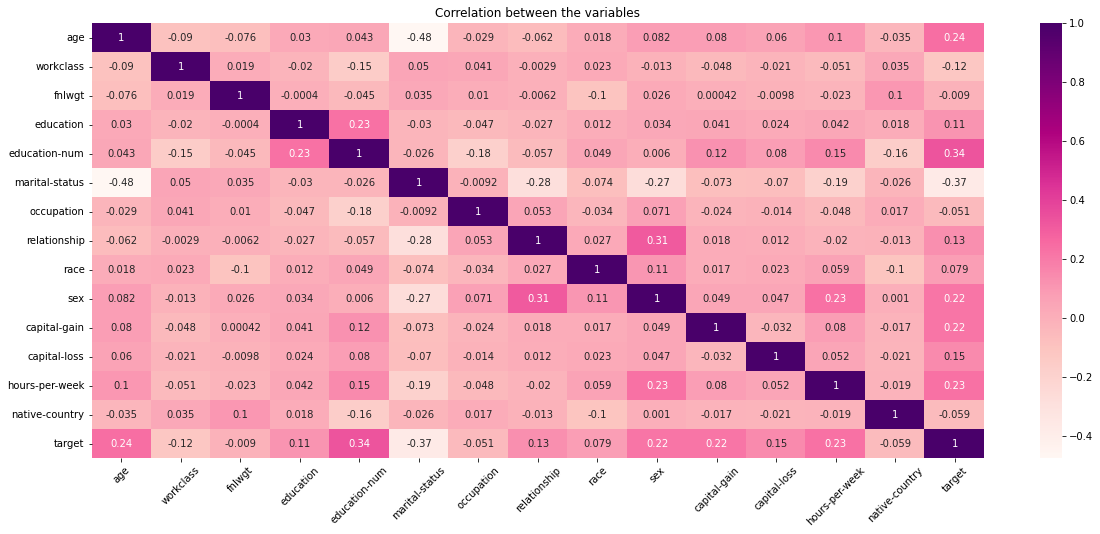

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,8))# Sample figsize in inches
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

## Training/Testing Models

### 1) Test with our implementation

#### A- Import Our implementation

In [ ]:
class MyDecisionTree(object):
    
    def __init__(self, max_depth=None):
        """        
            Args:
                max_depth: maximum depth of the tree including the root node.
        """
        self.tree = {}
        self.residual_tree = {} ## For prediction
        self.max_depth = max_depth

        
    def fit(self, X, y, depth):
        """
            Args:
                X     : N*D matrix corresponding to the data points
                Y     : N*1 array corresponding to the labels of the data points
                depth : depth of node of the tree

            Output:
                node : A dictionary that contains this node information
        """

        # base cases
        unique_labels = np.unique(y) 
        
        ## Check if we reached the maximum depth: we then assign the class according to the majority
        # or all remaining are of same class: by default, it is the majority, so, it is assigned to that class
        if (len(unique_labels)==1) or (depth == max_depth): 
            unique_labels, counts_unique_labels = np.unique(y, return_counts=True)
            index = counts_unique_labels.argmax() #returns index of the max value
            classification = unique_labels[index]    
            return classification
    
        #split the data according to the best attribute:
        # Step 1: Find best feature 
        # Step 2: Split on this feature 
        # Split 3: Partition on the best feature and split 
        best_feat, best_split  = find_best_feature(X, y) 
        best_split, information_gain = find_best_split(X, y, best_feat) 
        X_left, X_right, y_left, y_right = partition_classes(X, y, best_feat, best_split) 
        
        #if the best split is categorical?
        if isinstance(best_split,str):
            question = "{} == {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        
        else: #numerical feature
            question = "{} <= {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        
        node = {question: []}
        
        """                              ...
                                          .
                                {Weather} == {Rainy}
                                .                    .
                            .                            .
                        Yes_tree                           No_tree
                {Another_Attr} == {Value}          {Another_Attr} == {Value}
        """
        
        # find answers (recursion) by splitting the result trees
        
        depth+=1 
        yes_answer = self.fit(X_left,y_left, depth)  # RECURSION on the left sub tree
        no_answer = self.fit(X_right, y_right, depth) ## RECURSION on the right sub tree
        
        if yes_answer == no_answer: ## Both trees are the same
            node = yes_answer
        else:
            node[question].append(yes_answer) ## Append the questions to the answers
            node[question].append(no_answer)
        
        self.tree = node ## The tree is equal to the node
        return node
        
    def predict(self, record,flag=1):
        """
        classify a sample in test data set using self.tree and return the predicted label
            Args:
                record: D*1, a single data point that should be classified
        
            Output:
                 prediction: True if the predicted class label is 1, False otherwise      
        
        """
        if flag == 1: ## First time
            self.residual_tree = self.tree
        question = list(self.residual_tree.keys())[0]
        feature, comparison, value = question.split() ## Split the question to get the feature and its value

        
        ## Check if str or int
        if comparison == "==": # String
            if record[int(feature)] == value:
                answer = self.residual_tree[question][0]  ## Left sub tree
            else:
                answer = self.residual_tree[question][1] ## Right sub-tree
        elif comparison == "<=": #Integer
            if record[int(feature)] <= float(value):
                answer = self.residual_tree[question][0] ## Right Sub-tree
            else:
                answer = self.residual_tree[question][1] ## Left sub-tree        try: ## Integer
                
        # base case
        if not isinstance(answer, dict):  ## If we have the answer
            return answer
    
        # recursion
        else:
            self.residual_tree = answer ## The residual tree is the answer !
            return self.predict(record,0) ## have flag = 0 so the residual tree is our sub-problem

In [ ]:
def find_best_feature(X, y):
    """
    Compute and return the optimal attribute to split on and optimal splitting value

            Inputs:
                - X              : (N,D) list containing all data attributes
                - y              : a list of labels

            Outputs:
                - best_feature   : Best Feature to split on
                - best_split_val : Best Split Value for this feature
        
    """
    
    """
        
    Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           feature 0:  -->  info_gain = 0.32
           feature 1:  -->  info_gain = 0.17
           feature 2:  -->  info_gain = 0.4199
        
       best_split_feature: 2 best_split_val: 22
    """
    
    
    best_info_gain = 0
    best_feature = 0
    best_split_val = 0
    
    for feature_index in range(len(X[0])): ## Loop over the features , find the best split 
        
        current_best_split_val, current_best_info_gain =  find_best_split(X, y,  feature_index)
        
        if current_best_info_gain > best_info_gain:
            
            best_info_gain = current_best_info_gain
            best_feature = feature_index
            best_split_val = current_best_split_val
            
    return best_feature, best_split_val
def find_best_split(X, y, split_attribute):
    
    """
    Compute and return the optimal split value for a given attribute, along with the corresponding information gain

        Inputs:
            - X               : (N,D) list containing all data attributes
            - y               : a list array of labels
            - split_attribute : Column of X on which to split

        Outputs:
            - best_split_val  : optimal split value for a given attribute
            - best_info_gain  : the corresponding information gain
    
    """
    
    """
    
      Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           split_val = 1  -->  info_gain = 0.17
           split_val = 2  -->  info_gain = 0.01997
           split_val = 3  -->  info_gain = 0.01997
           split_val = 4  -->  info_gain = 0.32
           split_val = 5  -->  info_gain = 0
        
       best_split_val = 4; info_gain = .32; 
    """
    
    
    best_info_gain = 0 # Initialize the best information gain
    
    X = np.array(X)
    column_split = X[:,split_attribute]

    column_split = np.unique(column_split) ## Get the unique values only !
    best_split_val = column_split[0] ## Set the best split as the initial one ( in case it is the only one)

    for split_val in column_split:
        current_X_left, current_X_right, current_y_left, current_y_right = partition_classes(X, y, split_attribute, split_val) ## Call the partition classes function
        
        current_y = []
        current_y.append(current_y_left)
        current_y.append(current_y_right)

        current_info_gain = information_gain(y,current_y) ## Calculate the information gain
        
        if current_info_gain > best_info_gain: ## check if it is better than before
            best_info_gain = current_info_gain
            best_split_val = split_val

    return best_split_val, best_info_gain
def partition_classes(X, y, split_attribute, split_val):
    """
    Partition the data(X) and labels(y) based on the split value    

            Inputs:
            - X               : (N,D) list containing all data attributes
            - y               : a list of labels
            - split_attribute : column index of the attribute to split on
            - split_val       : either a numerical or categorical value to divide the split_attribute

            Outputs:
            - X_left          : X left after partitioning
            - X_right         : X right after partitioning
            - y_left          : y left after partitioning
            - y_right         : y right after partitioning
    
    """
    """
    Example:
    
    X = [[3, 'aa', 10],                 y = [1,
         [1, 'bb', 22],                      1,
         [2, 'cc', 28],                      0,
         [5, 'bb', 32],                      0,
         [4, 'cc', 32]]                      1]
    
    Here, columns 0 and 2 represent numeric attributes, while column 1 is a categorical attribute.
    
    Consider the case where we call the function with split_attribute = 0 (the index of attribute) and 
            split_val = 3 (the value of attribute).
            
    Then we divide X into two lists - X_left, where column 0 is <= 3 and X_right, where column 0 is > 3.
    
    X_left = [[3, 'aa', 10],                 y_left = [1,
              [1, 'bb', 22],                           1,
              [2, 'cc', 28]]                           0]
              
    X_right = [[5, 'bb', 32],                y_right = [0,
               [4, 'cc', 32]]                           1]

    Consider another case where we call the function with split_attribute = 1 and split_val = 'bb'
    Then we divide X into two lists, one where column 1 is 'bb', and the other where it is not 'bb'.
        
    X_left = [[1, 'bb', 22],                 y_left = [1,
              [5, 'bb', 32]]                           0]
              
    X_right = [[3, 'aa', 10],                y_right = [1,
               [2, 'cc', 28],                           0,
               [4, 'cc', 32]]                           1]
               
    """
    
    X = np.array(X)
    column_split = X[:,split_attribute]
    
    X_left=[]
    y_right = []
    X_right = []
    y_left = []
    
    counter=0 ## Counter for appending

    if isinstance(split_val,str) == False: ## Numerical attribute
        
        for i in column_split:
            
            if i <= split_val:
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            
            counter+=1
            
    else: ## Categorical attribute
        
        for i in column_split:
            
            if i == split_val: ## == and NOT <=
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            
            counter+=1

    return X_left, X_right, y_left, y_right 
def information_gain(previous_y, current_y):
    """
    Compute and return the information gain from partitioning the previous_y labels into the current_y labels.

        Inputs:
            - previous_y : the distribution of original labels (0's and 1's)
            - current_y  : the distribution of labels after splitting based on a particular
                         split attribute and split value

        Outputs:
            - info_gain : The information gain after partitioning
        
    
    """ 
    conditional_entropy = 0 ## IG = H(Y) - CE(Y|X)
    
    for y in current_y:
        conditional_entropy += (entropy(y)*len(y)/len(previous_y))

    info_gain = entropy(previous_y) - conditional_entropy
    return info_gain
def entropy(class_y):
    """ 
    Compute the entropy for a list of classes
    
        Input: 
            - class_y: list of class labels (0's and 1's)

        Output: 
            - The entropy         
            
    """
    
    if len(class_y) <=1: ## Handling if there is only 1 or 0 labels left
        return 0
    
    total_count = np.bincount(class_y) # count 0 and 1
    
    probabilities = total_count[np.nonzero(total_count)] / len(class_y) # Find the probabilities
    
    if len(probabilities) <= 1 : ## Handling if the length of the probabilities is less than or equal to 1
        return 0

    return - np.sum(probabilities * np.log2(probabilities)) ## Entropy equation

In [ ]:
def DecisionTreeEvalution(id3,X,y, verbose=False):
    """ Calculate the Accuracy of our decision tree
            Inputs:
                id3: a tree object
                X: features
                y: labels
                verbose: whether to print the accuracy or not
    """
    y_predicted = []
    for record in X: 
        y_predicted.append(id3.predict(record)) #predict records
        
    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]
    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy
def print_nested_dict(d):
    node = list(d.keys())[0] #root
    
    print(node, ':')
    #left tree
    print('Left tree')
    if isinstance(d[node][0], dict):
        print_nested_dict(d[node][0])
    else: print(d[node])
    #right
    print('Right tree')
    if isinstance(d[node][1], dict):
        print_nested_dict(d[node][1])
    else: print(d[node])
    

#### B- Test it on all Dataset

In [ ]:
df2.select_dtypes(exclude=['object']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target'],
      dtype='object')

In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'sex', 'native-country']
numerical = ['age','fnlwgt', 'education-num','capital-gain', 'capital-loss',
                'hours-per-week']
 
X = pd.concat([df2[categorical], df2[numerical]], axis=1) ## Just sort them, no need for encoding
y = df2['target']

#split data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

In [ ]:
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()

Fitting Our Model

In [ ]:
max_depth = 7
inital_depth = 0
id3_dt = MyDecisionTree(max_depth)

# Building a tree
print("Fitting the decision tree with maximum depth {}".format(max_depth))
id3_dt.fit(X_train, y_train, inital_depth)

# Evaluating the decision tree
print("Accuracy = {} %".format(np.round(DecisionTreeEvalution(id3_dt,X_test,y_test),2)*100))

Fitting the decision tree with maximum depth 7
Accuracy = 84.0 %


Accuracy with full dataset is: 84.0% in 17m 26s

In [ ]:
#Visualizing Model's Output
print_nested_dict(id3_dt.tree)

2 == Married-civ-spouse :
Left tree
10 <= 12 :
Left tree
11 <= 5013 :
Left tree
10 <= 8 :
Left tree
8 <= 37 :
Left tree
13 <= 48 :
Left tree
[0, {'4 == Not-in-family': [1, 0]}]
Right tree
4 == Not-in-family :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
8 <= 66 :
Left tree
[0, {'9 <= 26248': [1, 0]}]
Right tree
9 <= 26248 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
8 <= 35 :
Left tree
8 <= 24 :
Left tree
[0, {'12 <= 1740': [0, 1]}]
Right tree
12 <= 1740 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
12 <= 1844 :
Left tree
[0, {'12 <= 1977': [1, 0]}]
Right tree
12 <= 1977 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
8 <= 61 :
Left tree
1 == Preschool :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
11 <= 10566 :
Left tree
11 <= 9386 :
Left tree
0 == Local-gov :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
[{'0 == Local-gov': [0, 1]}, 0]
Right tree
[{'11 <= 9386': [{'0 == Local-gov': [0, 1]}, 0]}, 1]
Right tree
11 <= 5013 :
Left tree
12 <= 1740 :
Left tree
13 <= 30 :
Left tree
4

**Explain why the results are either better or worse:**

It is better here as you had so much features (Curse of dimensionality), and ignored fnlwgt feature 


### 2) Using Sklearn

In [ ]:
X=df.drop(['target'] , axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, shuffle=True)

**Perform hyper-parameter tuning using gridsearch.**

In [ ]:
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [2,5,10,15,20,25]},
              {'min_samples_leaf': [2,5,10,15,20,25]}]
dtree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
acc = accuracy_score(y_test, predictions)
dtree_score=np.round(acc*100,2)
dtree_score

84.16

In [ ]:
dtree.best_params_

{'criterion': 'gini', 'max_depth': 10}

<b> Visualize the tree by using the sklearn functions

In [ ]:

dt_clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 10)
dt_clf.fit(X, y)

feature_names = list(X_train.columns)
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_tree.png')
Image(graph.create_png())

Calculating gini impurity for each node, the lowest value of gini impurity (we didn't get the correctly labeling element) 

The two features are: marital-status and educational number. eventually, we'll see them on the top of important features and that seem OK as we are trying to reach an pure gini quickly.

### 3) Rerun the model on the most important features

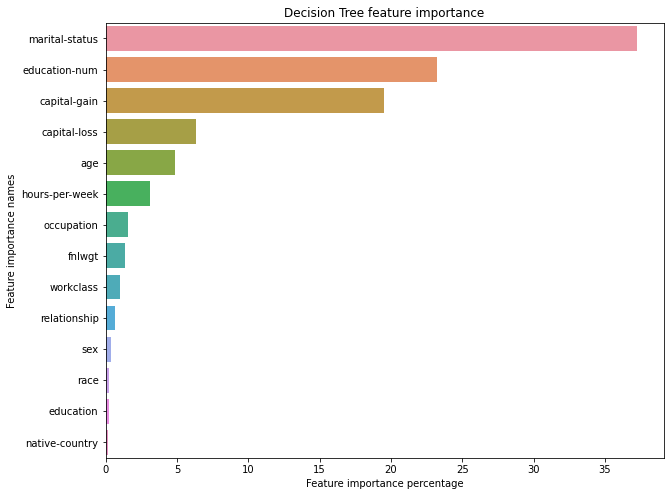

In [ ]:
cols= X.columns
importance=  dt_clf.tree_.compute_feature_importances()*100
data={'feature_names':cols, 'feature_importance':importance}
feat_df = pd.DataFrame(data)
#Sort the DataFrame
feat_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=feat_df['feature_importance'], y=feat_df['feature_names']);
#Add labels
plt.title('Decision Tree feature importance');
plt.xlabel('Feature importance percentage');
plt.ylabel('Feature importance names');

In [ ]:
X=df2[feat_df['feature_names'].iloc[0:5]].reset_index()
X= X.drop(labels='index', axis=1)
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle=True)

In [ ]:
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()

Fitting Our Model

In [ ]:
max_depth = 7
inital_depth = 0
id3_dt = MyDecisionTree(max_depth)

# Building a tree
print("Fitting the decision tree with maximum depth {}".format(max_depth))
id3_dt.fit(X_train, y_train, inital_depth)

# Evaluating the decision tree
print("Accuracy = {} %".format(np.round(DecisionTreeEvalution(id3_dt,X_test,y_test),2)*100))

Fitting the decision tree with maximum depth 7
Accuracy = 85.0 %


Accuracy with 5 features is: 85.0 % in 33s

In [ ]:
#Visualizing Model's Output
print_nested_dict(id3_dt.tree)

0 == Married-civ-spouse :
Left tree
1 <= 12 :
Left tree
2 <= 5013 :
Left tree
1 <= 7 :
Left tree
3 <= 36 :
Left tree
[0, {'1 <= 5': [0, {'4 <= 0': [0, 1]}]}]
Right tree
1 <= 5 :
Left tree
[0, {'4 <= 0': [0, 1]}]
Right tree
4 <= 0 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
3 <= 35 :
Left tree
3 <= 28 :
Left tree
[0, {'4 <= 1740': [0, 1]}]
Right tree
4 <= 1740 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
4 <= 1740 :
Left tree
[0, {'4 <= 1977': [1, 0]}]
Right tree
4 <= 1977 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
3 <= 60 :
Left tree
1 <= 1 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
2 <= 20051 :
Left tree
2 <= 10566 :
Left tree
2 <= 9386 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
[{'2 <= 9386': [1, 0]}, 1]
Right tree
[{'2 <= 10566': [{'2 <= 9386': [1, 0]}, 1]}, 0]
Right tree
2 <= 5013 :
Left tree
4 <= 1740 :
Left tree
3 <= 29 :
Left tree
[0, {'2 <= 4386': [1, 0]}]
Right tree
2 <= 4386 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
4 <= 1977 :
Left tree
[1, {'4 <=

### 4) Compare With KNN

<b> Note: I didn't use OneHotEncoding according to the curse of dimensionality, it's too much to have 95 attributes instead of 14 with 5% improvement

Note that: there's missed column in the lab dataset called: fnlwgt

In [ ]:
X=df.drop(['target','native-country'] , axis=1)
y = df['target']
#I - KNN
clf = KNeighborsClassifier()
scores1 = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for KNN = {}%'.format(np.round(scores1.mean()*100,2)))


#II - DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores2 = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for DecisionTreeClassifier = {}%'.format(np.round(scores2.mean()*100,2)))

Average Score for KNN = 76.68%
Average Score for DecisionTreeClassifier = 80.64%


<b> Decision Tree is better, so no need to get the Gridsearch of KNN:</b>
- KNN tends to be slower with large datasets because it scans the whole dataset to predict as it doesn’t generalize the data in advance.
- DecisionTree is capable of fitting complex datasets unlike KNN


## Findings and Observations

Notes: 
- Please Notice that I've used the adult.data as my main dataframe, I didn't use the **adult.test** data.
- please notice that I've included **finwgt**, as you've not included it in the notebook.
_________________________________________________________________
Findings related To requirements: 
- The accuracy We got is 84%, while last lab accuracy is 80% and that's due to forgetting **finwgt feature** and didn't encode data (o*rdinal is better than OHE to avoid Curse of dimensionality*)
- In Sklearn model, the first two features that tree split on are: 
 - marital-status 
 - educational number
- Rerunning the model with the top 5 important features:
 - Accuracy with 5 features is: 85.0 % in 33s
 - Accuracy with full dataset is: 84.0% in 17m 26s (our implementation need to be optimized, SKlearn is Amzaing!)
- Sklearn Model get 85.0% in 5s
- Comparing with KNN, Decision Tree is better:
 - KNN tends to be slower with large datasets because it scans the whole dataset to predict as it doesn’t generalize the data in advance.
 - DecisionTree is capable of fitting complex datasets unlike KNN
_________________________________________________________________
Data Observations:
- There were Nulls in the shape of '?' and the elements of any columns have initial space, So we had to remove both while loading 
- Data are imbalanced with:
 - 75% [<=50K]  and  25% [>50K]
- Number of males are twice number of females
- Percentage of Males that can get >50K are more than females [33% to  12%]
- People who passed higher education can get get >50K than who don't (hold Bachelor, Master, ..etc)
- people who can get >50K are normally working >40h/week which is more than <=50K/Y people hours 
- Categorical data should be encoded ordinally not OHE to avoid Curse of dimensionality [ Tried both and almost no change]

**=======================================================================================================**



## **Bonus Task : Work with another *regression* dataset from your choice [3 points]**
Use sklearn DecisionTree regressor on a regression dataset of your choice. It needs to be a one that we did not use in the course so far.  <br>
1. Perform necessary preprocessing/cleaning. (2 points) <br>
2. Run the DecisionTree regressor and report the Mean Squared Error. (1 point)

##[Fish Market Dataset](https://www.kaggle.com/aungpyaeap/fish-market)


The goal is to estimate weight of the fish individuals

### EDA

Preprocessing Data

In [ ]:
fish=pd.read_csv('Fish.csv')
fish.head(5)

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
fish.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [ ]:
#check for missing data, duplicates
print('Train - Missing values -> {}'.format(fish.isna().sum().sum()))
print('Train - Duplicate values -> {}'.format(fish.duplicated().sum()))

Train - Missing values -> 0
Train - Duplicate values -> 0


<b> Fish Species Distribution

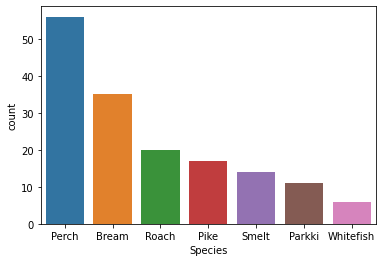

In [ ]:
sns.countplot(x = 'Species', data = fish, order = fish['Species'].value_counts().index);

<b> Fish Features Heat Map

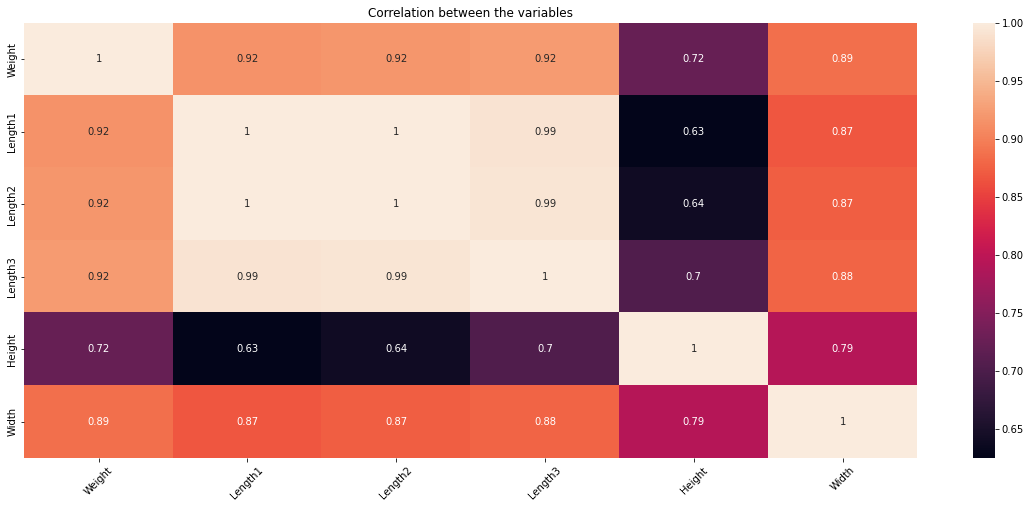

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,8))# Sample figsize in inches
sns.heatmap(fish.corr(), annot = True, ax=ax);
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [ ]:
#Correlation with target
fish.corr()['Weight'].sort_values().to_frame()

Weight
Height   0.724345
Width    0.886507
Length1  0.915712
Length2  0.918618
Length3  0.923044
Weight   1.000000

### Feature Engineering

In [ ]:
fish['Lengths']= fish['Length1']+fish['Length2']+fish['Length3']
fish.drop(['Length1','Length2','Length3'], axis=1, inplace=True)
fish.corr()['Weight'].sort_values().to_frame()

Weight
Height   0.724345
Width    0.886507
Lengths  0.920817
Weight   1.000000

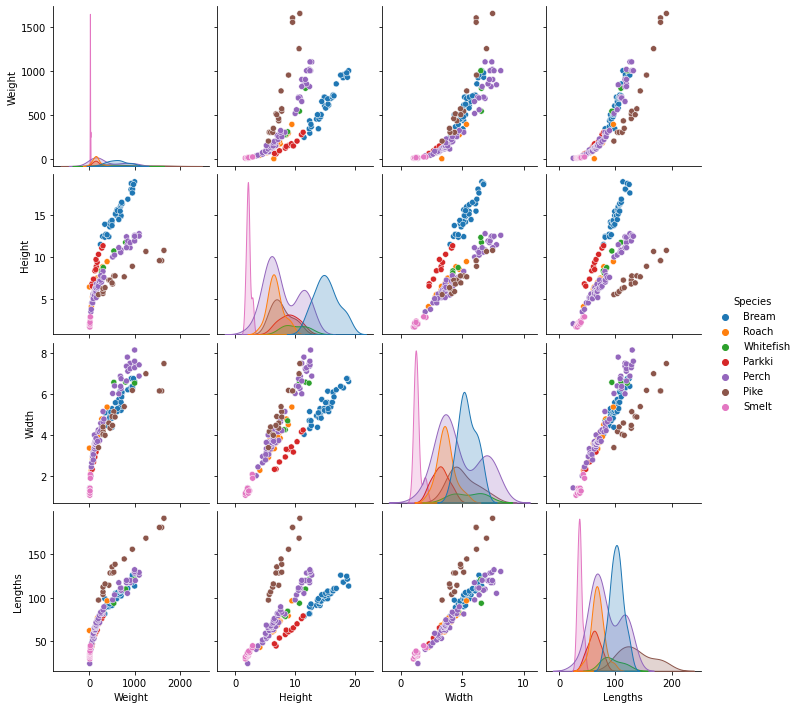

In [ ]:
sns.pairplot(fish, kind='scatter', hue='Species');

### Training/Testing Models

In [ ]:
X=fish.drop(['Weight','Species'],axis=1)
y=fish['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
predicted = dt_reg.predict(X_test)
mse= mean_squared_error(y_test, predicted)
r2_test = r2_score(y_test,predicted)
print('DecisionTree Regressor on test data=> MSE: {} - R2: {}'.format(mse,r2_test))

DecisionTree Regressor on test data=> MSE: 3407.7309375 - R2: 0.9111349430134943
